/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


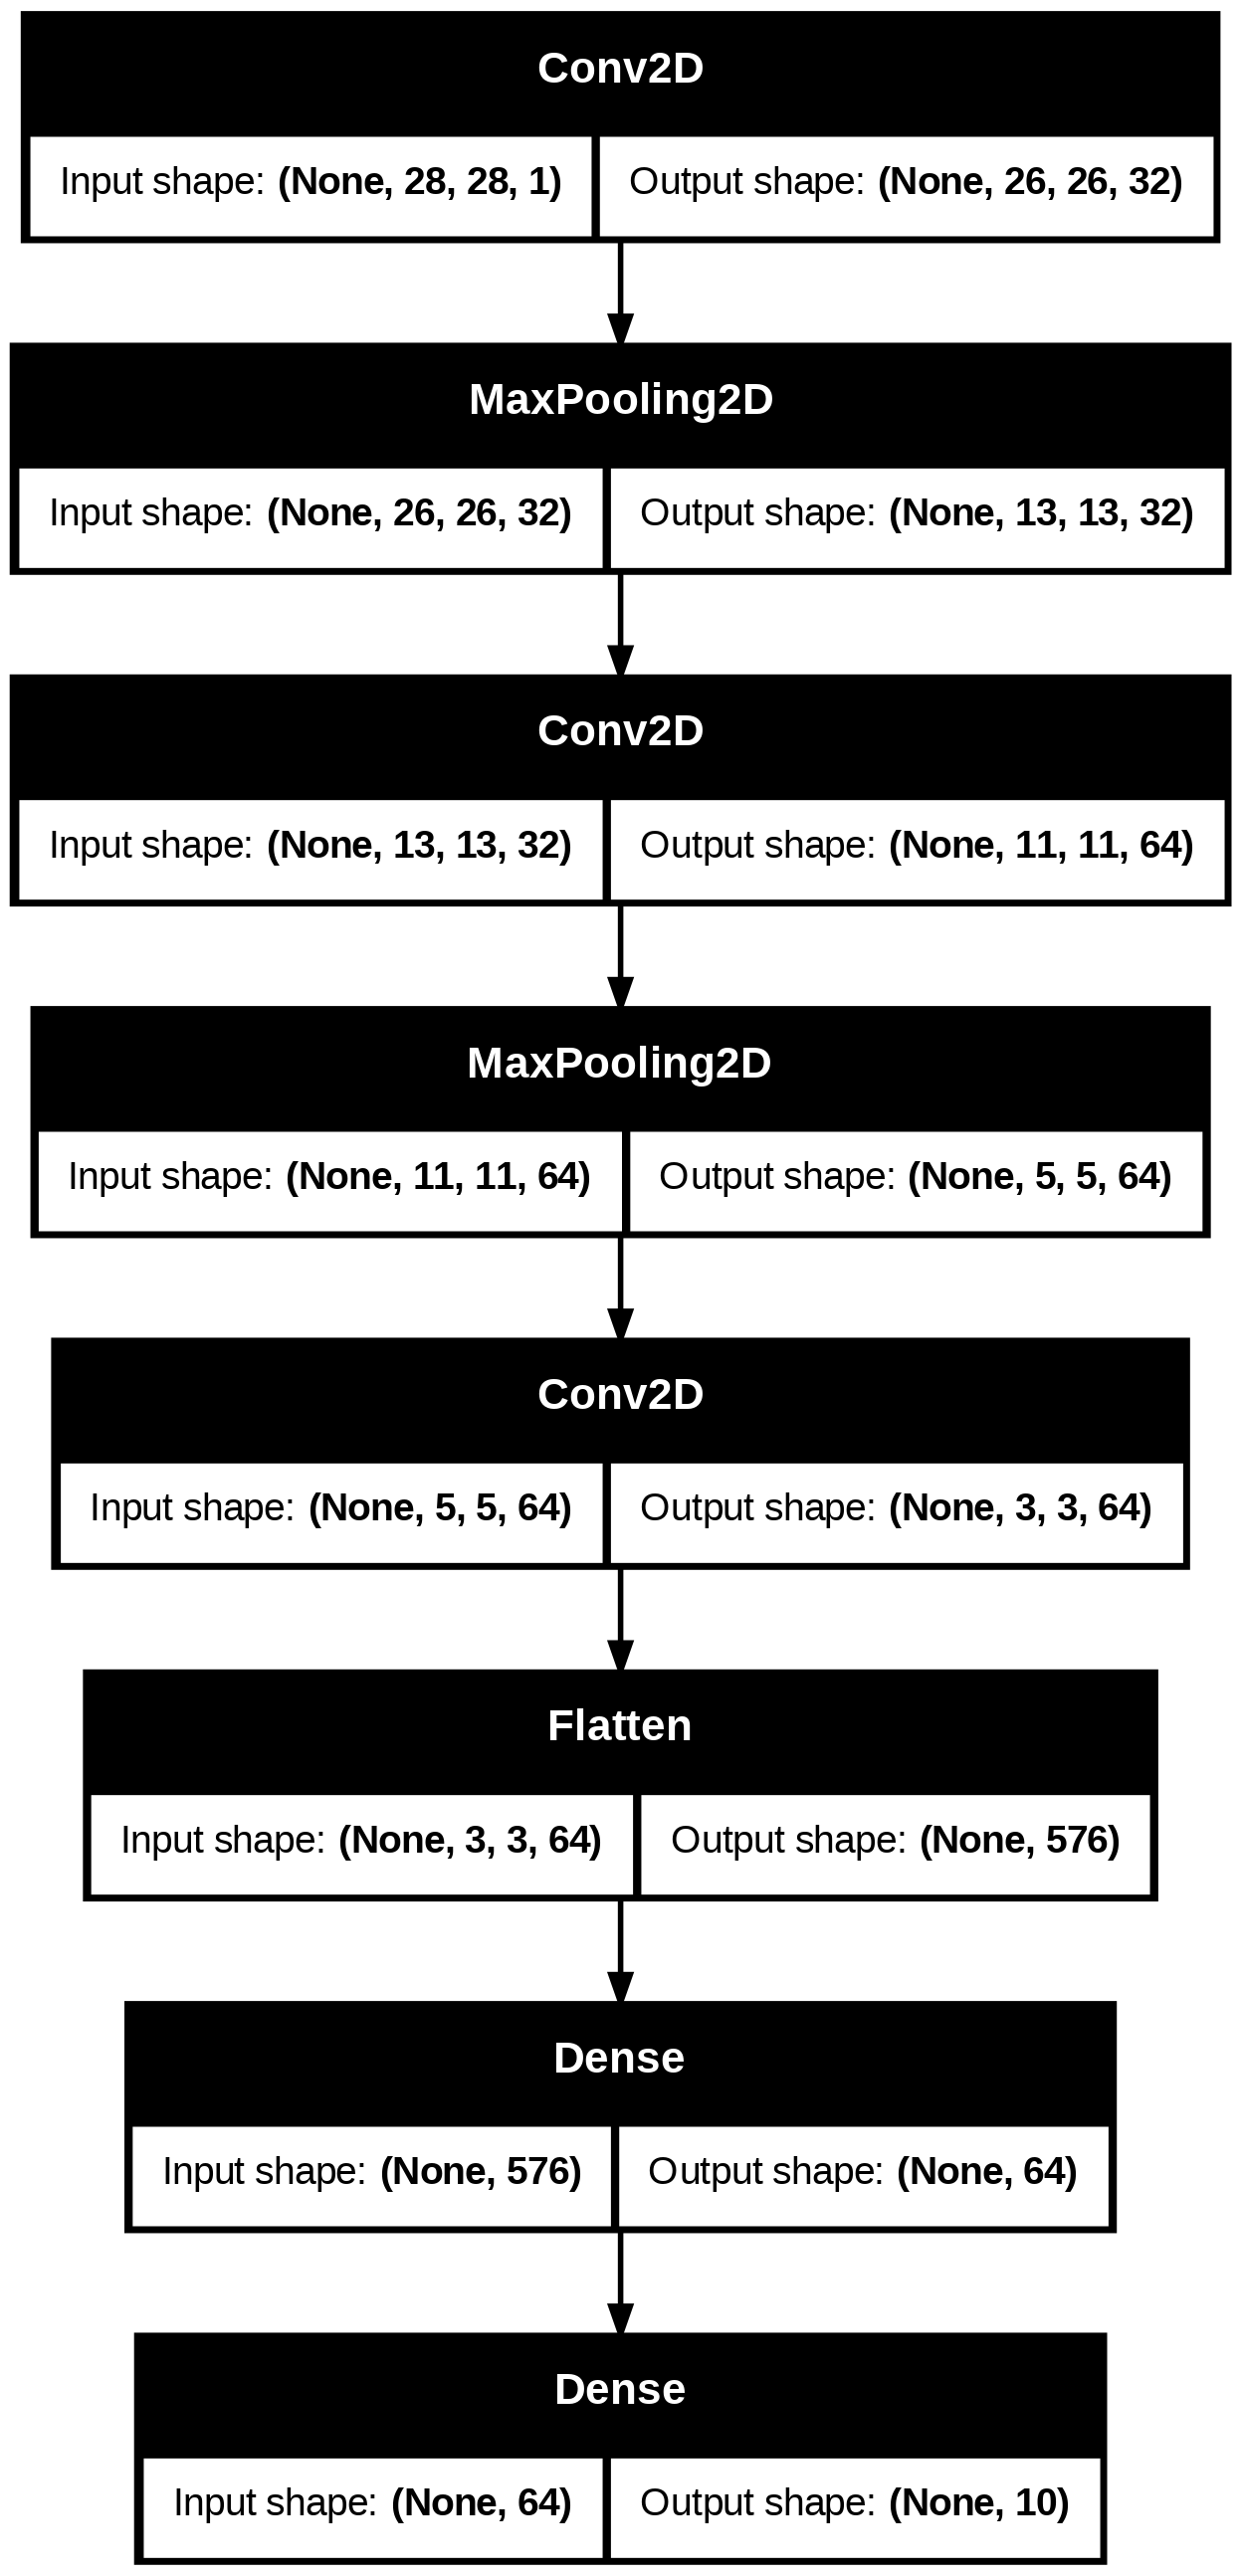

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

# Membangun model CNN sederhana
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Menyimpan gambar arsitektur model ke dalam file PNG
plot_model(model, to_file='model.png', show_shapes=True)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.9826 - loss: 0.0554 - val_accuracy: 0.9791 - val_loss: 0.0663
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9884 - loss: 0.0371 - val_accuracy: 0.9879 - val_loss: 0.0381
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


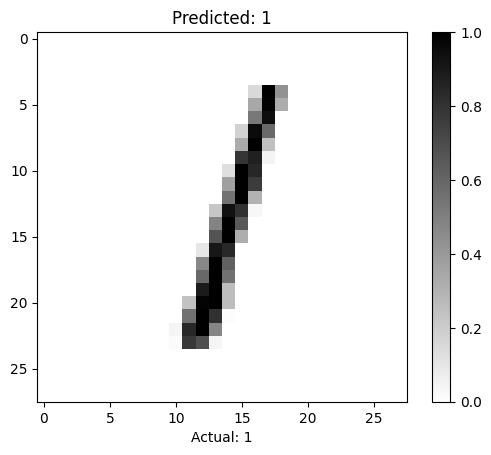

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Melatih model
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=2,
          validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))

# Memilih satu gambar dari dataset uji
image_index = 2  # Ganti dengan indeks gambar yang ingin Anda prediksi
sample_image = test_images[image_index].reshape(1, 28, 28, 1)

# Melakukan prediksi
predictions = model.predict(sample_image)
predicted_label = np.argmax(predictions)

# Menampilkan gambar dan hasil prediksi
plt.figure()
plt.imshow(test_images[image_index], cmap=plt.cm.binary)
plt.colorbar()
plt.title(f"Predicted: {predicted_label}")
plt.xlabel("Actual: " + str(test_labels[image_index]))
plt.show()




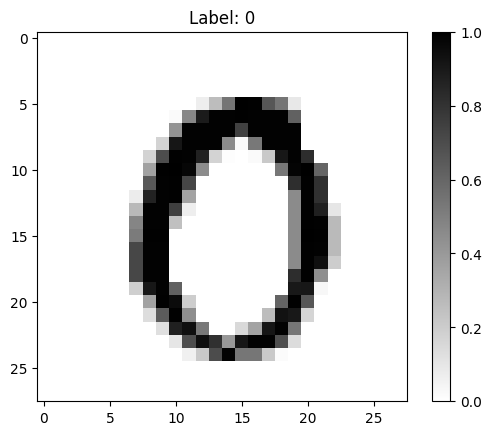

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Label: 0


In [5]:
# Memilih satu gambar dari dataset uji
image_index = 13 # Ganti dengan indeks gambar yang ingin Anda pilih
sample_image = test_images[image_index]
sample_label = test_labels[image_index]

# Menampilkan gambar
plt.figure()
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.colorbar()
plt.title(f"Label: {sample_label}")
plt.show()

# Melakukan prediksi pada gambar tersebut
sample_image = sample_image.reshape(1, 28, 28, 1)
predictions = model.predict(sample_image)
predicted_label = np.argmax(predictions)
print(f"Predicted Label: {predicted_label}")
